In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from joblib import dump, load

In [2]:
df = pd.read_csv('csvs/Mall_Customers.csv')
df_copy = df.copy()
df_copy.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df_copy.isnull().value_counts()

CustomerID  Genre  Age    Annual Income (k$)  Spending Score (1-100)
False       False  False  False               False                     200
Name: count, dtype: int64

In [4]:
df_copy.duplicated().value_counts()

False    200
Name: count, dtype: int64

In [5]:
# CustomerID is not relvent for ou prediction.
df_copy = df_copy.drop(columns=['CustomerID'])

The exercise mentioned using a one-hot encoder for export. I looked into it, but I'm not sure how it compares to the get_dummies method.

In [6]:
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the 'Genre' column
encoded_genre = encoder.fit_transform(df_copy[['Genre']])

# Create a DataFrame with the encoded features
encoded_genre_df = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['Genre']))

# Drop the original 'Genre' column and concatenate the encoded features
df_copy = df_copy.drop(columns=['Genre']).reset_index(drop=True)
df_copy = pd.concat([df_copy, encoded_genre_df], axis=1)
df_copy

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0.0,1.0
1,21,15,81,0.0,1.0
2,20,16,6,1.0,0.0
3,23,16,77,1.0,0.0
4,31,17,40,1.0,0.0
...,...,...,...,...,...
195,35,120,79,1.0,0.0
196,45,126,28,1.0,0.0
197,32,126,74,0.0,1.0
198,32,137,18,0.0,1.0


In [7]:
scaler = StandardScaler()
scaled_df_copy = scaler.fit_transform(df_copy)

model = KMeans(n_clusters=4)
cluster_labels = model.fit_predict(df_copy)
cluster_labels

array([1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [8]:
model.cluster_centers_

array([[40.39473684, 87.        , 18.63157895,  0.47368421,  0.52631579],
       [25.05660377, 40.73584906, 62.62264151,  0.58490566,  0.41509434],
       [52.05797101, 46.42028986, 39.88405797,  0.5942029 ,  0.4057971 ],
       [32.875     , 86.1       , 81.525     ,  0.55      ,  0.45      ]])

In [9]:
df_copy['cluster_labels'] = cluster_labels

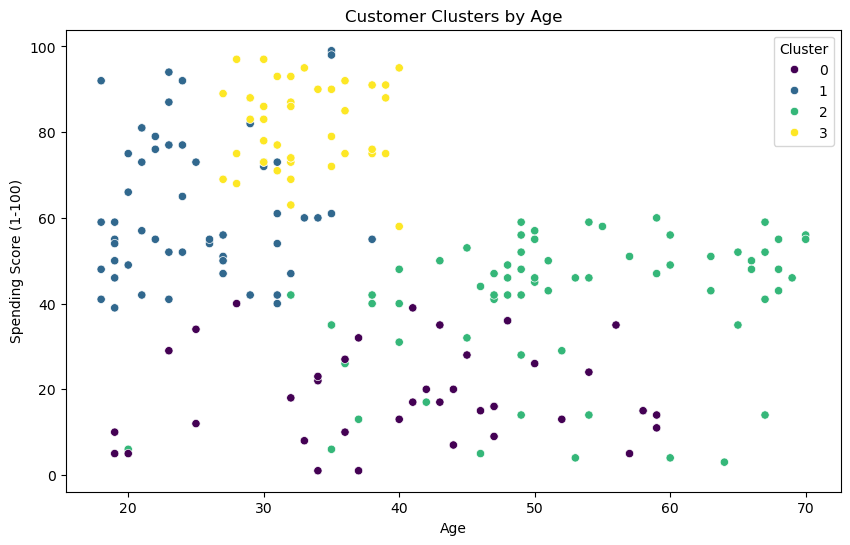

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_labels', data=df_copy, palette='viridis')
plt.title('Customer Clusters by Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

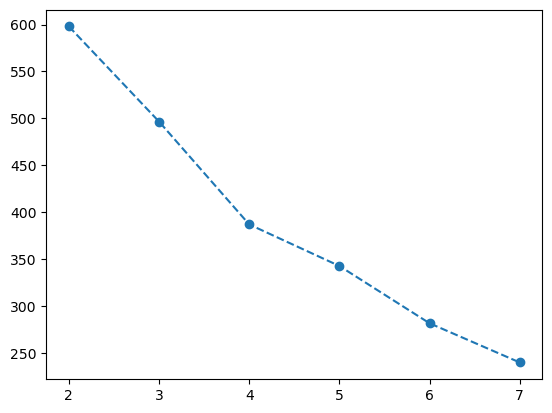

In [11]:
ssd = []

for k in range(2,8):
    model = KMeans(n_clusters=k)
    model.fit(scaled_df_copy)

    ssd.append(model.inertia_)

plt.plot(range(2 ,8), ssd, 'o--')
plt.show

k=4 looks like a good choice seeing that the down trend is not sharp after k=4

In [12]:
model = KMeans(n_clusters=4)
cluster_labels = model.fit_predict(df_copy)
df_copy['cluster_labels'] = cluster_labels

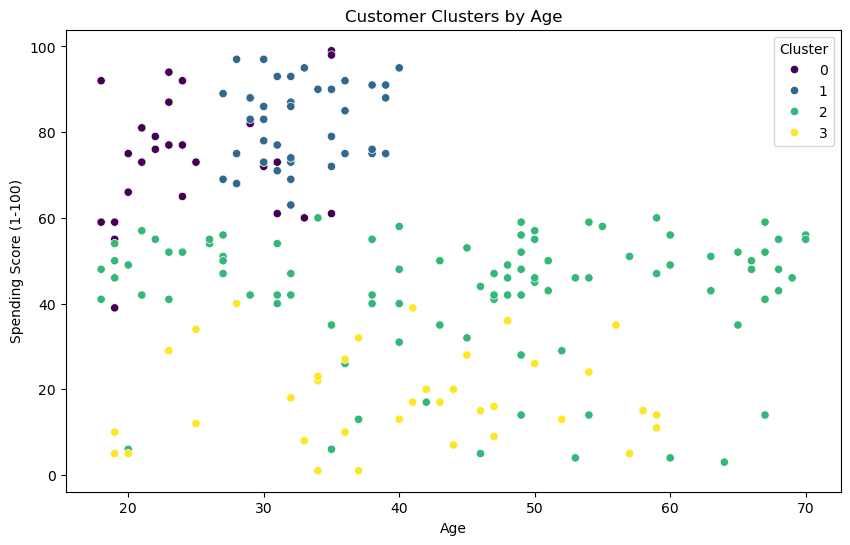

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_labels', data=df_copy, palette='viridis')
plt.title('Customer Clusters by Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [14]:
dump(model, 'kmeans_model.joblib')
dump(scaler, 'standard_scaler_model.joblib')
dump(encoder, 'OneHotEncoder.joblib')

['OneHotEncoder.joblib']

In [15]:
loaded_model = load('kmeans_model.joblib')
loaded_scaler = load('standard_scaler_model.joblib')
loaded_encoder = load('OneHotEncoder.joblib')

I will add to the new customers details df a random new person due to error: n_samples=3 should be >= n_clusters=4.

gpt: For K-Means clustering, the minimum number of samples in your dataset should be at least equal to the number of clusters you want to create. This is because each cluster must have at least one data point to form a centroid. Therefore, if you want to use k clusters, you need at least k samples in your dataset.
General Rule:
Minimum Samples Required: n_samples ≥ k
​
If you want to use 4 clusters, you need at least 4 samples in your dataset.

In [16]:
customer_details = {
    'CustomerID': [201, 202, 203, 204],
    'Genre': ['Male', 'Female', 'Male', 'Male'],
    'Age': [45, 28, 33, 30],
    'Annual Income (k$)': [20, 22, 19, 23],
    'Spending Score (1-100)': [45, 92, 20, 45]
}

customer_details_df = pd.DataFrame(customer_details)
customer_details_df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,201,Male,45,20,45
1,202,Female,28,22,92
2,203,Male,33,19,20
3,204,Male,30,23,45


In [17]:
# CustomerID is not relvent for ou prediction.
customer_details_df = customer_details_df.drop(columns=['CustomerID'])

In [18]:
encoded_genre = loaded_encoder.fit_transform(customer_details_df[['Genre']])
encoded_genre_df = pd.DataFrame(encoded_genre, columns=loaded_encoder.get_feature_names_out(['Genre']))
customer_details_df = customer_details_df.drop(columns=['Genre']).reset_index(drop=True)
customer_details_df = pd.concat([customer_details_df, encoded_genre_df], axis=1)
customer_details_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,45,20,45,0.0,1.0
1,28,22,92,1.0,0.0
2,33,19,20,0.0,1.0
3,30,23,45,0.0,1.0


In [19]:
scaled_customer_details_df = loaded_scaler.fit_transform(customer_details_df)

cluster_labels = loaded_model.fit_predict(customer_details_df)
customer_details_df['cluster_labels'] = cluster_labels
customer_details_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,cluster_labels
0,45,20,45,0.0,1.0,0
1,28,22,92,1.0,0.0,1
2,33,19,20,0.0,1.0,2
3,30,23,45,0.0,1.0,3


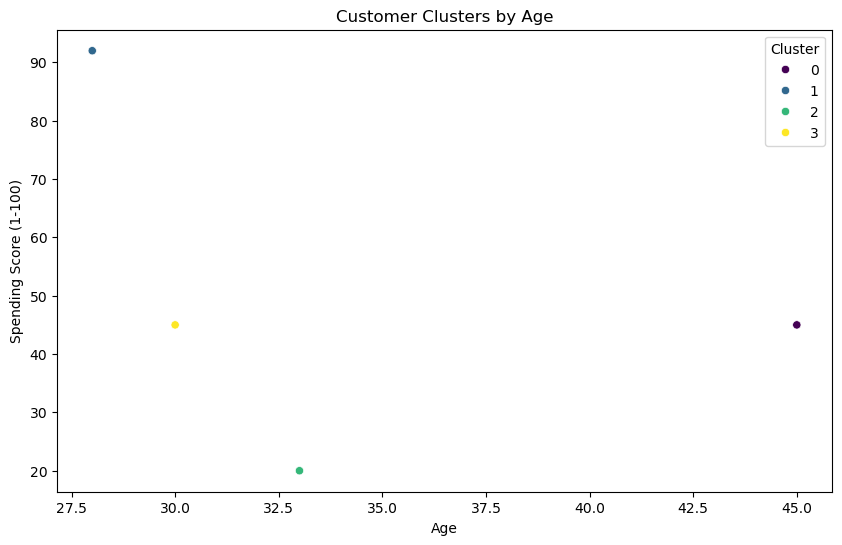

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='cluster_labels', data=customer_details_df, palette='viridis')
plt.title('Customer Clusters by Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()